# 数据集：Trending YouTube Video Statistics

### 高威 3120211002

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,f1_score

#### 1.数据预处理

##### 1.1 读取数据集

In [2]:
dataset = pd.read_csv('CAvideos.csv')
dataset.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


##### 1.2数据属性

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  de

可以得到，数据共16列，其中category_id、views、likes、dislikes、comment_count为数值属性，comments_disabled,rating_disabled,viedo_error_or_removed为二值属性，其他为标称属性。

##### 1.3标称属性每种类别的频数

In [7]:
dataset['trending_date'].value_counts().head(5)

17.14.11    200
18.19.02    200
18.29.03    200
18.30.03    200
18.31.03    200
Name: trending_date, dtype: int64

In [8]:
dataset['title'].value_counts().head(5)

Most Popular Violin Covers of Popular Songs 2018 || Best Instrumental Violin Covers 2018             15
Drake - God's Plan (Official Audio)                                                                  15
Bruno Mars,Charlie Puth,Ed Sheeran Best Christmas Songs,Greatest Hits Pop Playlist Christmas 2018    13
Deleted video                                                                                        11
Merry Christmas 2018 - Top Christmas Songs Playlist 2018 - Best Christmas Songs Ever                 10
Name: title, dtype: int64

In [9]:
dataset['channel_title'].value_counts().head(5)

SET India          192
MSNBC              189
FBE                188
The Young Turks    186
REACT              183
Name: channel_title, dtype: int64

In [10]:
dataset['publish_time'].value_counts().head(5)

2017-12-20T23:00:00.000Z    11
2018-03-11T16:00:00.000Z    10
2018-01-29T04:00:00.000Z    10
2017-11-18T17:00:00.000Z    10
2018-02-11T15:00:01.000Z    10
Name: publish_time, dtype: int64

##### 1.3查看数据5数概括

In [5]:
dataset.describe(include = 'all')

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
count,40881,40881,40881,40881,40881.000000,40881,40881,4.088100e+04,4.088100e+04,4.088100e+04,4.088100e+04,40881,40881,40881,40881,39585
unique,24427,205,24573,5076,NaN,23613,20157,NaN,NaN,NaN,NaN,24422,2,2,2,22345
top,6ZfuNTqbHE8,17.14.11,Most Popular Violin Covers of Popular Songs 20...,SET India,NaN,2017-12-20T23:00:00.000Z,[none],NaN,NaN,NaN,NaN,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
freq,8,200,15,192,NaN,11,2385,NaN,NaN,NaN,NaN,8,40298,40602,40854,130
mean,NaN,NaN,NaN,NaN,20.795553,NaN,NaN,1.147036e+06,3.958269e+04,2.009195e+03,5.042975e+03,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,6.775054,NaN,NaN,3.390913e+06,1.326895e+05,1.900837e+04,2.157902e+04,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,20.000000,NaN,NaN,1.439020e+05,2.191000e+03,9.900000e+01,4.170000e+02,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,3.712040e+05,8.780000e+03,3.030000e+02,1.301000e+03,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,9.633020e+05,2.871700e+04,9.500000e+02,3.713000e+03,NaN,NaN,NaN,NaN,NaN


##### 1.4查看数据的缺失值，并将每列的缺失值数量按降序排列

In [3]:
dataset.isnull().sum().sort_values(ascending=False)

description               1296
video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
dtype: int64

从运行结果可以看出，description列存在缺失值，缺失数量为1296

##### 1.5数据可视化

##### 1.5.1直方图查看数据分布

array([[<AxesSubplot:title={'center':'category_id'}>,
        <AxesSubplot:title={'center':'views'}>],
       [<AxesSubplot:title={'center':'likes'}>,
        <AxesSubplot:title={'center':'dislikes'}>],
       [<AxesSubplot:title={'center':'comment_count'}>, <AxesSubplot:>]],
      dtype=object)

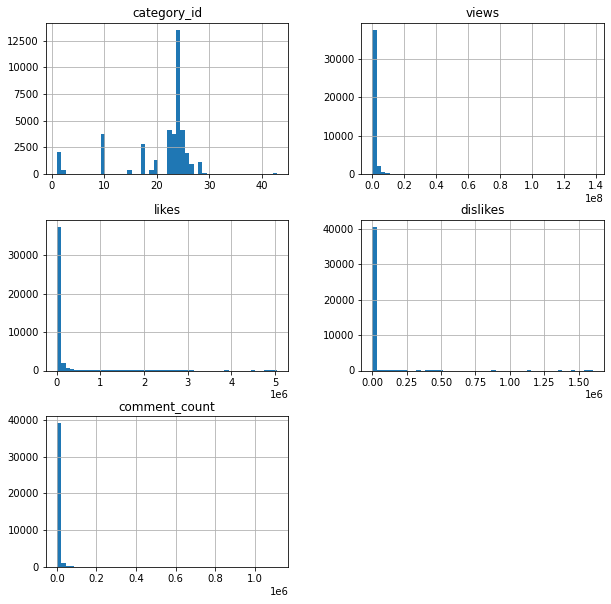

In [11]:
a = dataset[['category_id','views','likes','dislikes','comment_count']]
a.hist(figsize=(10 ,10), bins = 50)

##### 1.5.2使用盒图观察属性值分布及离群点

category_id         AxesSubplot(0.125,0.125;0.133621x0.755)
views            AxesSubplot(0.285345,0.125;0.133621x0.755)
likes             AxesSubplot(0.44569,0.125;0.133621x0.755)
dislikes         AxesSubplot(0.606034,0.125;0.133621x0.755)
comment_count    AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

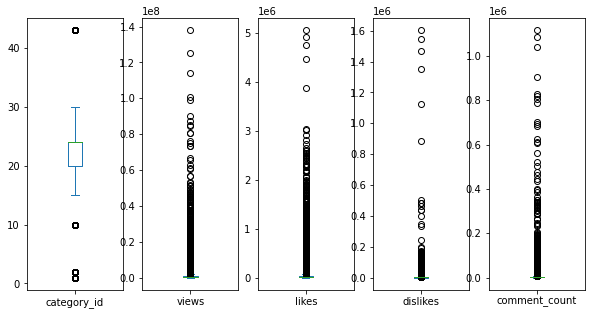

In [12]:
a.plot.box(figsize=(10,5),subplots=True)

#### 2.空值处理

##### 2.1剔除方法

从1.4可知，只有description字段发生缺失，采用处理方式是将缺失部分剔除

In [15]:
dataset_drop = dataset.dropna()
dataset_drop.describe()

,category_id,views,likes,dislikes,comment_count
count,39585.000000,3.958500e+04,3.958500e+04,3.958500e+04,3.958500e+04
mean,20.778123,1.169234e+06,4.059694e+04,2.058693e+03,5.159716e+03
std,6.808714,3.437842e+06,1.345967e+05,1.931258e+04,2.189959e+04
min,1.000000,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,1.497150e+05,2.395000e+03,1.040000e+02,4.420000e+02
50%,24.000000,3.831200e+05,9.244000e+03,3.140000e+02,1.357000e+03
75%,24.000000,9.831390e+05,2.967000e+04,9.760000e+02,3.821000e+03
max,43.000000,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06


In [16]:
dataset.describe()

,category_id,views,likes,dislikes,comment_count
count,40881.000000,4.088100e+04,4.088100e+04,4.088100e+04,4.088100e+04
mean,20.795553,1.147036e+06,3.958269e+04,2.009195e+03,5.042975e+03
std,6.775054,3.390913e+06,1.326895e+05,1.900837e+04,2.157902e+04
min,1.000000,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,1.439020e+05,2.191000e+03,9.900000e+01,4.170000e+02
50%,24.000000,3.712040e+05,8.780000e+03,3.030000e+02,1.301000e+03
75%,24.000000,9.633020e+05,2.871700e+04,9.500000e+02,3.713000e+03
max,43.000000,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06


表1为处理之后，表2为处理之前，可以看出总记录条数减少，空值处理之后，视频的观看数等要高于处理之前，这说明空值处理可以提高数据质量

可视化的对比删除前后属性值变化

<AxesSubplot:ylabel='Frequency'>

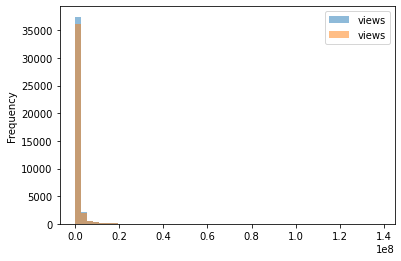

In [19]:
frames = [dataset['views'],dataset_drop['views']]
result = pd.concat(frames, axis=1)
result.plot.hist(alpha=0.5, bins=50)

可以看出总记录条数减少

##### 2.2 使用频率最高值来填补缺失值

In [20]:
value={'description':dataset.description.mode()} 
dataset_fill_mode = dataset.fillna(value)
value

{'description': 0    Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
 dtype: object}

##### 2.3 通过属性的相关关系来填补缺失值

In [23]:
dataset_fill_title = dataset['description'].fillna(dataset['title'])
dataset_fill_title.isna().sum()

0

##### 2.4通过数据对象之间的相似性来填补缺失值

In [24]:
def most_similar(x,dataset):

    for item in  dataset['category_id'].values:
        if x.category_id  == item:
            return dataset[dataset['category_id']== item].description.mode()
        else:
            return ''

dataset_fill_similarity = dataset

dataset_fill_similarity['similar_description'] = dataset_fill_similarity.apply(lambda x: most_similar(x,dataset),axis=1)

dataset_fill_similarity = dataset_fill_similarity['description'].fillna(dataset_fill_similarity['similar_description'])

dataset_fill_similarity.isna().sum()

0